# Extraction of Twitter tweets.

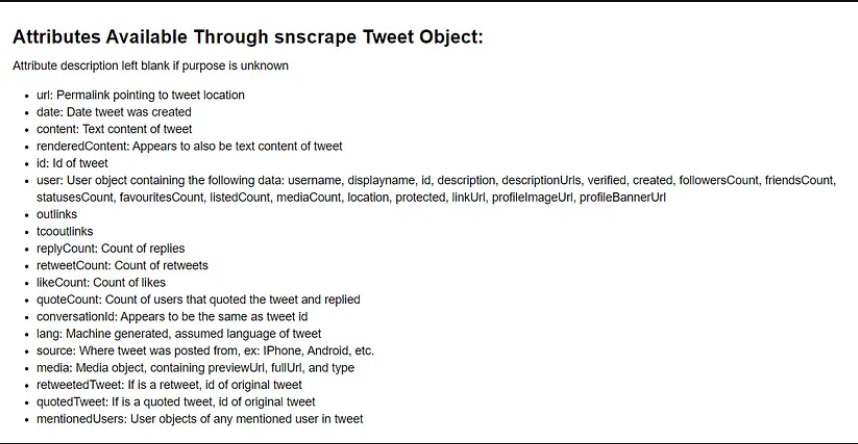

In [1]:
import pandas as pd
import numpy as np
import snscrape.modules.twitter as sntwitter

In [2]:
keys=['Nifty','Reliance industries','Sensex','Stock market','Investment','Shareholders','Dividend','Private equity','Ownership','Equity research','Equity financing']

In [3]:
tweets=[]
for key in keys:
    scraper=sntwitter.TwitterSearchScraper(key)
    for i, tweet in enumerate(scraper.get_items()):
        data=[
            tweet.date,
            tweet.id,
            tweet.url,
            tweet.user.username,
            tweet.user.location,
            tweet.sourceLabel,
            key,
            tweet.rawContent,
            tweet.likeCount,
            tweet.retweetCount
        ]
        tweets.append(data)
        if i>50:
            break
    

In [4]:
df=pd.DataFrame(tweets, columns=['Date','ID','URL','Username','Location','Source','Keyword','Raw_content','num_of_likes','num_of_retweets'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Date             572 non-null    datetime64[ns, UTC]
 1   ID               572 non-null    int64              
 2   URL              572 non-null    object             
 3   Username         572 non-null    object             
 4   Location         572 non-null    object             
 5   Source           572 non-null    object             
 6   Keyword          572 non-null    object             
 7   Raw_content      572 non-null    object             
 8   num_of_likes     572 non-null    int64              
 9   num_of_retweets  572 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 44.8+ KB


In [6]:
df.head()

,Date,ID,URL,Username,Location,Source,Keyword,Raw_content,num_of_likes,num_of_retweets
0,2023-03-31 13:32:29+00:00,1641795604245549056,https://twitter.com/money_2_wealth/status/1641...,money_2_wealth,"Gujarat, India",TradingView,Nifty,nifty 50 31-3-2023 new month starting - #NIFT...,0,0
1,2023-03-31 13:32:27+00:00,1641795596087435264,https://twitter.com/EagleEyeReview/status/1641...,EagleEyeReview,,EagleEyeStockAPP3,Nifty,Important Intraday Levels for Next Session\nSt...,0,0
2,2023-03-31 13:32:18+00:00,1641795554970673153,https://twitter.com/subi_sa/status/16417955549...,subi_sa,StockMarket,Twitter for iPhone,Nifty,"#Stock price don’t rise or fall when you want,...",0,0
3,2023-03-31 13:32:11+00:00,1641795528865492992,https://twitter.com/vsmtradingdesk/status/1641...,vsmtradingdesk,"Amravati, India",Twitter for Android,Nifty,#StockMarketindia #Nifty #NiftyBank https://t....,0,0
4,2023-03-31 13:32:00+00:00,1641795480286838784,https://twitter.com/NiftyRockstar/status/16417...,NiftyRockstar,SOL Voyager,Twitter for Android,Nifty,@GIitchyMagic Gm and have a nice Friday👋☕️🤩,0,0


In [7]:
df['Raw_content'][0]

'nifty 50 31-3-2023 new month starting  - #NIFTY chart on @TradingView https://t.co/kTH9wqkmNd'

In [8]:
df.tail()

,Date,ID,URL,Username,Location,Source,Keyword,Raw_content,num_of_likes,num_of_retweets
567,2023-03-30 13:00:45+00:00,1641425230278131712,https://twitter.com/braithwaiteca/status/16414...,braithwaiteca,Canada,Hootsuite Inc.,Equity financing,Our partnership with @Swoop_canada provides a ...,0,0
568,2023-03-30 12:34:23+00:00,1641418595027636229,https://twitter.com/JOHNNOB35752453/status/164...,JOHNNOB35752453,Pluto,Twitter Web App,Equity financing,"Climate financing is finally here, but will th...",0,0
569,2023-03-30 12:15:47+00:00,1641413911516786689,https://twitter.com/shipdotenergy/status/16414...,shipdotenergy,,Blog2Social APP,Equity financing,"Rotor sail company, Norsepower, has raised €28...",1,0
570,2023-03-30 12:11:29+00:00,1641412832410456065,https://twitter.com/Ainvest_Wire/status/164141...,Ainvest_Wire,New York,AinvestNews,Equity financing,P97 Networks: Raised $40 mln in equity financi...,0,0
571,2023-03-30 12:09:00+00:00,1641412206805004289,https://twitter.com/MrSauravThakur/status/1641...,MrSauravThakur,,PiQSuite-saurav,Equity financing,⚠️ P97 NETWORKS - RAISED $40 MLN IN EQUITY FI...,0,0


In [9]:
df['Keyword'].unique()

array(['Nifty', 'Reliance industries', 'Sensex', 'Stock market',
       'Investment', 'Shareholders', 'Dividend', 'Private equity',
       'Ownership', 'Equity research', 'Equity financing'], dtype=object)

In [10]:
df.isnull().sum()

Date               0
ID                 0
URL                0
Username           0
Location           0
Source             0
Keyword            0
Raw_content        0
num_of_likes       0
num_of_retweets    0
dtype: int64

# Applying sentiment analysis to raw content

In [11]:
from textblob import TextBlob
def get_polarity(text):
    
    #sentiment=TextBlob(text).sentiment.polarity
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    return sentiment

In [12]:
df['Polarity']=df['Raw_content'].apply(get_polarity)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Date             572 non-null    datetime64[ns, UTC]
 1   ID               572 non-null    int64              
 2   URL              572 non-null    object             
 3   Username         572 non-null    object             
 4   Location         572 non-null    object             
 5   Source           572 non-null    object             
 6   Keyword          572 non-null    object             
 7   Raw_content      572 non-null    object             
 8   num_of_likes     572 non-null    int64              
 9   num_of_retweets  572 non-null    int64              
 10  Polarity         572 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 49.3+ KB


In [14]:
df.head()

,Date,ID,URL,Username,Location,Source,Keyword,Raw_content,num_of_likes,num_of_retweets,Polarity
0,2023-03-31 13:32:29+00:00,1641795604245549056,https://twitter.com/money_2_wealth/status/1641...,money_2_wealth,"Gujarat, India",TradingView,Nifty,nifty 50 31-3-2023 new month starting - #NIFT...,0,0,0.068182
1,2023-03-31 13:32:27+00:00,1641795596087435264,https://twitter.com/EagleEyeReview/status/1641...,EagleEyeReview,,EagleEyeStockAPP3,Nifty,Important Intraday Levels for Next Session\nSt...,0,0,0.100000
2,2023-03-31 13:32:18+00:00,1641795554970673153,https://twitter.com/subi_sa/status/16417955549...,subi_sa,StockMarket,Twitter for iPhone,Nifty,"#Stock price don’t rise or fall when you want,...",0,0,0.200000
3,2023-03-31 13:32:11+00:00,1641795528865492992,https://twitter.com/vsmtradingdesk/status/1641...,vsmtradingdesk,"Amravati, India",Twitter for Android,Nifty,#StockMarketindia #Nifty #NiftyBank https://t....,0,0,0.000000
4,2023-03-31 13:32:00+00:00,1641795480286838784,https://twitter.com/NiftyRockstar/status/16417...,NiftyRockstar,SOL Voyager,Twitter for Android,Nifty,@GIitchyMagic Gm and have a nice Friday👋☕️🤩,0,0,0.600000


In [15]:
def get_sentiment(polarity):
    if polarity>0:
        return 'Positive'
    elif polarity<0:
        return 'Negative'
    else:
        return 'Neutral'

In [16]:
df['Sentiment']=df['Polarity'].apply(get_sentiment)

In [17]:
df.head()

,Date,ID,URL,Username,Location,Source,Keyword,Raw_content,num_of_likes,num_of_retweets,Polarity,Sentiment
0,2023-03-31 13:32:29+00:00,1641795604245549056,https://twitter.com/money_2_wealth/status/1641...,money_2_wealth,"Gujarat, India",TradingView,Nifty,nifty 50 31-3-2023 new month starting - #NIFT...,0,0,0.068182,Positive
1,2023-03-31 13:32:27+00:00,1641795596087435264,https://twitter.com/EagleEyeReview/status/1641...,EagleEyeReview,,EagleEyeStockAPP3,Nifty,Important Intraday Levels for Next Session\nSt...,0,0,0.100000,Positive
2,2023-03-31 13:32:18+00:00,1641795554970673153,https://twitter.com/subi_sa/status/16417955549...,subi_sa,StockMarket,Twitter for iPhone,Nifty,"#Stock price don’t rise or fall when you want,...",0,0,0.200000,Positive
3,2023-03-31 13:32:11+00:00,1641795528865492992,https://twitter.com/vsmtradingdesk/status/1641...,vsmtradingdesk,"Amravati, India",Twitter for Android,Nifty,#StockMarketindia #Nifty #NiftyBank https://t....,0,0,0.000000,Neutral
4,2023-03-31 13:32:00+00:00,1641795480286838784,https://twitter.com/NiftyRockstar/status/16417...,NiftyRockstar,SOL Voyager,Twitter for Android,Nifty,@GIitchyMagic Gm and have a nice Friday👋☕️🤩,0,0,0.600000,Positive


In [18]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [19]:
value_counts=df['Sentiment'].value_counts()
value_counts

Positive    307
Neutral     182
Negative     83
Name: Sentiment, dtype: int64

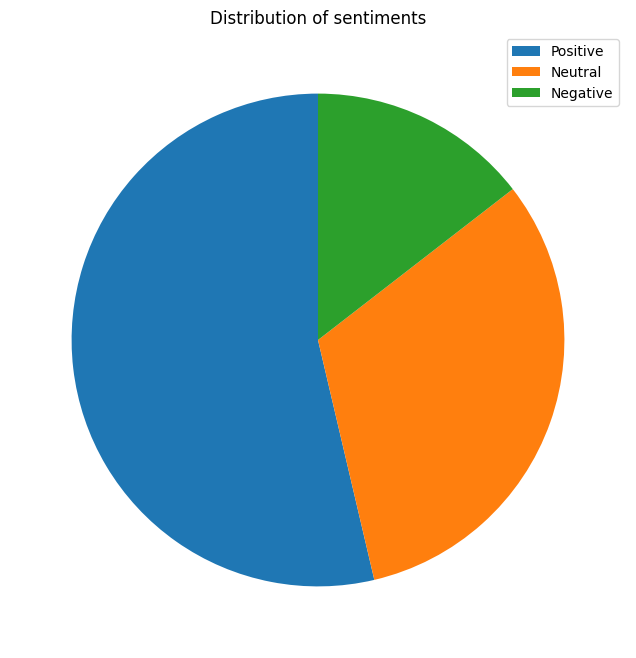

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.pie(value_counts, startangle=90)
plt.title('Distribution of sentiments')
plt.legend(value_counts.index, loc='best')
plt.show()

In [4]:
pip install --upgrade snscrape

     ---------------------------------------- 71.8/71.8 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: snscrape
    Found existing installation: snscrape 0.6.0.20230303
    Uninstalling snscrape-0.6.0.20230303:
      Successfully uninstalled snscrape-0.6.0.20230303
Note: you may need to restart the kernel to use updated packages.
